In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [2]:
data = pd.read_csv("Daily_Water_Intake.csv")
data

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor
...,...,...,...,...,...,...,...
29995,47,Male,97,3.45,Moderate,Cold,Good
29996,49,Female,109,5.32,High,Hot,Good
29997,56,Female,54,1.50,Moderate,Cold,Poor
29998,36,Male,106,4.00,Low,Hot,Good


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [4]:
data["Hydration Level"].value_counts()

Hydration Level
Good    23915
Poor     6085
Name: count, dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight (kg)'}>],
       [<Axes: title={'center': 'Daily Water Intake (liters)'}>,
        <Axes: >]], dtype=object)

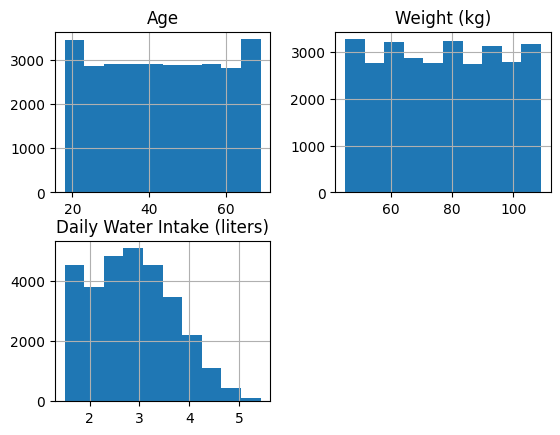

In [5]:
data[["Age", "Weight (kg)", "Daily Water Intake (liters)"]].hist()

In [6]:
data.Gender.value_counts()

Gender
Male      15032
Female    14968
Name: count, dtype: int64

In [7]:
data['Gender'] = (data['Gender'] == 'Male').astype('int8')

In [8]:
data

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,1,96,4.23,Moderate,Hot,Good
1,60,1,105,3.95,High,Normal,Good
2,36,1,68,2.39,Moderate,Cold,Good
3,19,0,74,3.13,Moderate,Hot,Good
4,38,1,77,2.11,Low,Normal,Poor
...,...,...,...,...,...,...,...
29995,47,1,97,3.45,Moderate,Cold,Good
29996,49,0,109,5.32,High,Hot,Good
29997,56,0,54,1.50,Moderate,Cold,Poor
29998,36,1,106,4.00,Low,Hot,Good


In [9]:
data['Physical Activity Level'].value_counts()

Physical Activity Level
High        10069
Low         10011
Moderate     9920
Name: count, dtype: int64

In [10]:
for level in data['Physical Activity Level'].value_counts().keys():
    data['Physical Activity Level ' + level] = (data['Physical Activity Level'] == level).astype("int8")

In [11]:
data.drop('Physical Activity Level', axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               30000 non-null  int64  
 1   Gender                            30000 non-null  int8   
 2   Weight (kg)                       30000 non-null  int64  
 3   Daily Water Intake (liters)       30000 non-null  float64
 4   Weather                           30000 non-null  object 
 5   Hydration Level                   30000 non-null  object 
 6   Physical Activity Level High      30000 non-null  int8   
 7   Physical Activity Level Low       30000 non-null  int8   
 8   Physical Activity Level Moderate  30000 non-null  int8   
dtypes: float64(1), int64(2), int8(4), object(2)
memory usage: 1.3+ MB


In [13]:
data.Weather.value_counts()

Weather
Hot       10081
Cold      10012
Normal     9907
Name: count, dtype: int64

In [14]:
for weather in data['Weather'].value_counts().keys():
    data['Weather_' + weather] = (data['Weather'] == level).astype("int8")

In [15]:
data.drop('Weather', axis=1, inplace=True)

In [16]:
data

,Age,Gender,Weight (kg),Daily Water Intake (liters),Hydration Level,Physical Activity Level High,Physical Activity Level Low,Physical Activity Level Moderate,Weather_Hot,Weather_Cold,Weather_Normal
0,56,1,96,4.23,Good,0,0,1,0,0,0
1,60,1,105,3.95,Good,1,0,0,0,0,0
2,36,1,68,2.39,Good,0,0,1,0,0,0
3,19,0,74,3.13,Good,0,0,1,0,0,0
4,38,1,77,2.11,Poor,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,47,1,97,3.45,Good,0,0,1,0,0,0
29996,49,0,109,5.32,Good,1,0,0,0,0,0
29997,56,0,54,1.50,Poor,0,0,1,0,0,0
29998,36,1,106,4.00,Good,0,1,0,0,0,0


In [17]:
data['Hydration Level'].value_counts()

Hydration Level
Good    23915
Poor     6085
Name: count, dtype: int64

In [18]:
data['Hydration Level'] = (data['Hydration Level'] == 'Good').astype('int8')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               30000 non-null  int64  
 1   Gender                            30000 non-null  int8   
 2   Weight (kg)                       30000 non-null  int64  
 3   Daily Water Intake (liters)       30000 non-null  float64
 4   Hydration Level                   30000 non-null  int8   
 5   Physical Activity Level High      30000 non-null  int8   
 6   Physical Activity Level Low       30000 non-null  int8   
 7   Physical Activity Level Moderate  30000 non-null  int8   
 8   Weather_Hot                       30000 non-null  int8   
 9   Weather_Cold                      30000 non-null  int8   
 10  Weather_Normal                    30000 non-null  int8   
dtypes: float64(1), int64(2), int8(8)
memory usage: 937.6 KB


In [20]:
y = data['Hydration Level']
x = data.drop('Hydration Level', axis=1)

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [110]:
# sampler = RandomOverSampler(sampling_strategy=0.5)
# x_train, y_train = sampler.fit_resample(x_train, y_train)

In [111]:
# undersampler = NearMiss(version=1, n_neighbors_ver3=3)
# x_train, y_train = undersampler.fit_resample(x_train, y_train)

In [112]:
y_train.value_counts()

Hydration Level
1    17956
0     4544
Name: count, dtype: int64

In [113]:
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [114]:
lr_model = LogisticRegression()
lr_model.fit(x_train_sc, y_train)
y_pred_test_lr = lr_model.predict(x_test_sc)
y_pred_train_lr = lr_model.predict(x_train_sc)
print(classification_report(y_test, y_pred_test_lr)), print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1541
           1       0.99      1.00      0.99      5959

    accuracy                           0.99      7500
   macro avg       0.99      0.97      0.98      7500
weighted avg       0.99      0.99      0.99      7500

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4544
           1       0.99      1.00      0.99     17956

    accuracy                           0.99     22500
   macro avg       0.99      0.97      0.98     22500
weighted avg       0.99      0.99      0.99     22500



(None, None)

In [115]:
f1_score(y_test, y_pred_test_lr), f1_score(y_train, y_pred_train_lr)

(0.9923294980823745, 0.9920628335960618)

In [116]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train_sc, y_train)
y_pred_test_lr = model.predict(x_test_sc)
y_pred_train_lr = model.predict(x_train_sc)
print(classification_report(y_test, y_pred_test_lr)), print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1541
           1       0.98      0.98      0.98      5959

    accuracy                           0.97      7500
   macro avg       0.96      0.96      0.96      7500
weighted avg       0.97      0.97      0.97      7500

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4544
           1       0.99      0.99      0.99     17956

    accuracy                           0.98     22500
   macro avg       0.97      0.97      0.97     22500
weighted avg       0.98      0.98      0.98     22500



(None, None)

In [117]:
model = GaussianNB()
model.fit(x_train_sc, y_train)
y_pred_test_lr = model.predict(x_test_sc)
y_pred_train_lr = model.predict(x_train_sc)
print(classification_report(y_test, y_pred_test_lr)), print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.52      0.85      0.64      1541
           1       0.95      0.79      0.87      5959

    accuracy                           0.81      7500
   macro avg       0.73      0.82      0.75      7500
weighted avg       0.86      0.81      0.82      7500

              precision    recall  f1-score   support

           0       0.53      0.83      0.64      4544
           1       0.95      0.81      0.87     17956

    accuracy                           0.81     22500
   macro avg       0.74      0.82      0.76     22500
weighted avg       0.86      0.81      0.83     22500



(None, None)

In [118]:
model = DecisionTreeClassifier(max_depth=8)
model.fit(x_train_sc, y_train)
y_pred_test_lr = model.predict(x_test_sc)
y_pred_train_lr = model.predict(x_train_sc)
print(classification_report(y_test, y_pred_test_lr)), print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1541
           1       0.99      0.99      0.99      5959

    accuracy                           0.98      7500
   macro avg       0.97      0.97      0.97      7500
weighted avg       0.98      0.98      0.98      7500

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4544
           1       0.99      0.99      0.99     17956

    accuracy                           0.99     22500
   macro avg       0.98      0.98      0.98     22500
weighted avg       0.99      0.99      0.99     22500



(None, None)

In [146]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
x_i, y_i = load_digits(return_X_y=True)

In [149]:
p = TSNE(n_components=2)
x_ip = p.fit_transform(x_i)

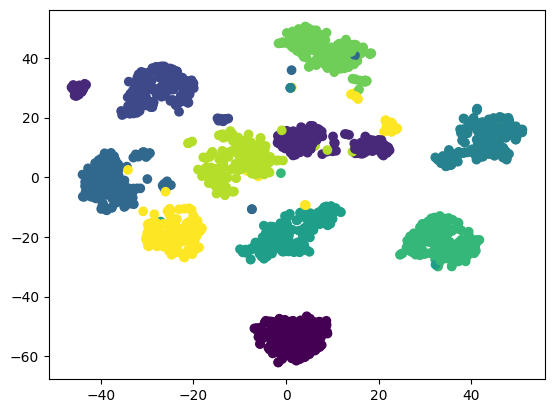

In [152]:
plt.scatter(x_ip[:, 0], x_ip[:, 1], c=y_i)